In [12]:
import pandas as pd
df2= {'Team':['Riders','Riders','Devils','Devils','Kings','Kings','Kings','Kings','Riders','Royals','Royals','Royals'],
            'Rank':[1,2,2,3,3,4,1,1,2,4,1,2],
            'Year':[2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
            'Points':[876,789,863,673,741,812,756,788,694,701,884,690],
            
           }
df=pd.DataFrame(df2)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [18]:
import matplotlib.pyplot as plt

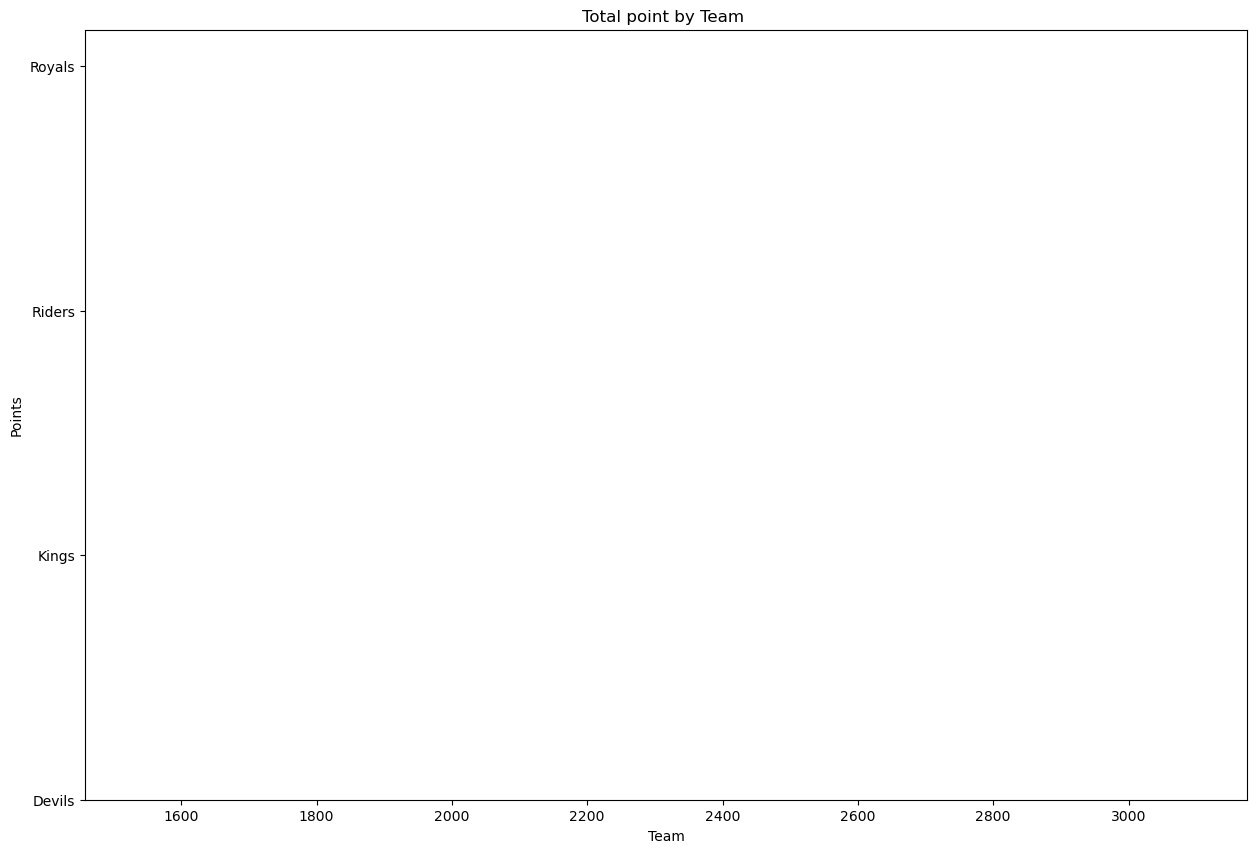

In [28]:
a=df.groupby('Team')['Points'].sum()
plt.figure(figsize=(15,10))
plt.bar(a.values,a.index)
plt.xlabel('Team')
plt.ylabel('Points')
plt.title('Total point by Team ')
plt.show()


SyntaxError: positional argument follows keyword argument (4116848504.py, line 1)